In [9]:
import sqlite3
import pandas as pd
import datetime as dt
import sqlalchemy.types as sqltypes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
connection = sqlite3.connect('nbadata.db')
cursor = connection.cursor()
# connection.close()


In [55]:
!ls

2018 NBA Hackathon Application - Business Track Prompt.pdf
game_data.csv
NBA Business Analytics.ipynb
nbadata.db
player_data.csv
test_set.csv
training_set.csv


In [59]:
# Read in Train CSV Data into .db File
# Train_data: 200 seconds
# start = dt.datetime.now()
# chunksize = 20000
# j = 0
# index_start = 1

# for df in pd.read_csv('training_set.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
#     df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

#     df['Game_Date'] = pd.to_datetime(df['Game_Date']) # Convert to datetimes

#     df.index += index_start

#     # Columns to keep
#     columns = ['Season', 'Game_ID', 'Game_Date', 'Away_Team', 'Home_Team', 'Country', 'RoundedViewers']

#     for c in df.columns:
#         if c not in columns:
#             df = df.drop(c, axis=1)    

#     j+=1

#     df.to_sql('train_data', connection, if_exists='append') # name of SQL table, connection, append
# #     dtype={'Season': sqltypes.String(length=8),
# #                                                                    'Game_ID': sqltypes.Integer,
# #                                                                    'Game_Date': sqltypes.Date,
# #                                                                    'Away_Team': sqltypes.String(length=3),
# #                                                                    'Home_Team': sqltypes.String(length=3),
# #                                                                    'Country': sqltypes.String(length=8),
# #                                                                    'RoundedViewers': sqltypes.Integer}
    
#     print('{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize))
    
#     index_start = df.index[-1] + 1 # update index start

13 seconds: completed 20000 rows
26 seconds: completed 40000 rows
40 seconds: completed 60000 rows
54 seconds: completed 80000 rows
69 seconds: completed 100000 rows
84 seconds: completed 120000 rows
99 seconds: completed 140000 rows
113 seconds: completed 160000 rows
125 seconds: completed 180000 rows
139 seconds: completed 200000 rows
154 seconds: completed 220000 rows
168 seconds: completed 240000 rows
181 seconds: completed 260000 rows
194 seconds: completed 280000 rows
195 seconds: completed 300000 rows


In [4]:
# Check first rows of imported train_data
pd.read_sql_query('SELECT * FROM train_data', connection).head()

,index,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,RoundedViewers
0,1,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,C113,18
1,2,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,C193,1
2,3,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,C126,4
3,4,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,C163,11
4,5,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,C73,3


In [18]:
# Total Viewership by Game (first 5 rows)
game_df = pd.read_sql_query('SELECT Season, Game_ID, Game_Date, Away_Team, Home_Team,count(Country) as NumCountries, sum(RoundedViewers) as TotalViews FROM train_data GROUP BY Game_ID', connection)
print(game_df.describe())
game_df.head()

            Game_ID  NumCountries    TotalViews
count  2.000000e+03   2000.000000   2000.000000
mean   2.164997e+07    140.312500  16967.709500
std    5.000482e+04     17.953161  10906.922749
min    2.160000e+07     85.000000   1899.000000
25%    2.160061e+07    128.000000   9328.500000
50%    2.160122e+07    141.000000  14271.500000
75%    2.170060e+07    153.000000  21841.750000
max    2.170123e+07    193.000000  89246.000000


,Season,Game_ID,Game_Date,Away_Team,Home_Team,NumCountries,TotalViews
0,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,177,57691
1,2016-17,21600002,2016-10-25 00:00:00,UTA,POR,169,40740
2,2016-17,21600003,2016-10-25 00:00:00,SAS,GSW,185,60428
3,2016-17,21600004,2016-10-26 00:00:00,MIA,ORL,148,22756
4,2016-17,21600005,2016-10-26 00:00:00,DAL,IND,162,33922


In [20]:
game_df.dtypes

Season          object
Game_ID          int64
Game_Date       object
Away_Team       object
Home_Team       object
NumCountries     int64
TotalViews       int64
dtype: object

In [27]:
games1617 = game_df[game_df['Season'] == '2016-17']
games1718 = game_df[game_df['Season'] == '2017-18']

print('Summary for 2016-2017:')
print(games1617.filter(['NumCountries', 'TotalViews']).describe())
print()
print('Summary for 2017-2018:')
print(games1718.filter(['NumCountries', 'TotalViews']).describe())

Summary for 2016-2017:
       NumCountries    TotalViews
count   1013.000000   1013.000000
mean     143.667325  16774.337611
std       17.137288  10039.009483
min       95.000000   2955.000000
25%      132.000000   9611.000000
50%      144.000000  14271.000000
75%      156.000000  21758.000000
max      193.000000  70992.000000

Summary for 2017-2018:
       NumCountries    TotalViews
count    987.000000    987.000000
mean     136.869301  17166.175279
std       18.127231  11732.961813
min       85.000000   1899.000000
25%      124.000000   8955.000000
50%      138.000000  14285.000000
75%      150.000000  22003.500000
max      193.000000  89246.000000


Notes on above: There is a difference in the range and variance of the viewership of the two seasons - might be worthwhile to do different estimates based on  

In [62]:
# Total Viewership by HomeTeam
pd.read_sql_query('SELECT Home_Team, sum(RoundedViewers) as TotalViews FROM train_data GROUP BY Home_Team ORDER BY TotalViews desc', connection)

,Home_Team,TotalViews
0,CLE,2232203
1,GSW,2143244
2,OKC,1805096
3,BOS,1524266
4,LAL,1489788
5,HOU,1301071
6,SAS,1296606
7,NYK,1295577
8,PHI,1251455
9,TOR,1223301


In [63]:
# Total Viewership by AwayTeam
pd.read_sql_query('SELECT Away_Team, sum(RoundedViewers) as TotalViews FROM train_data GROUP BY Away_Team ORDER BY TotalViews desc', connection)

,Away_Team,TotalViews
0,GSW,2559144
1,CLE,2250267
2,OKC,1678862
3,BOS,1410294
4,HOU,1381180
5,SAS,1379352
6,LAL,1328284
7,NYK,1202510
8,PHI,1198370
9,MIN,1139163


,TotalViews
count,330.000000
mean,102834.603030
std,41506.064105
min,16527.000000
25%,74792.500000
50%,99364.000000
75%,126654.500000
max,255995.000000


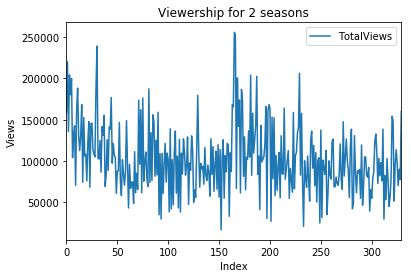

In [8]:
# Total Viewership by Date
# Grouped by Date: 330 days in dataset
date_df = pd.read_sql_query('SELECT Game_Date, sum(RoundedViewers) as TotalViews FROM train_data GROUP BY Game_Date ORDER BY date(Game_Date)', connection)
date_df.plot(title = 'Viewership for 2 seasons').set(xlabel = 'Index', ylabel='Views') #Plot ALL

date_df.describe()

In [112]:
# Total Viewership by Date
# Maximum Viewership
print('Information about largest spike:')
print(date_df.loc[date_df['TotalViews'] == date_df['TotalViews'].max()])
pd.read_sql_query("SELECT Game_ID, Away_Team, Home_Team, Sum(RoundedViewers) as Views FROM train_data WHERE Game_Date = '2017-10-20 00:00:00' GROUP BY Game_ID ORDER BY Views desc", connection)

Information about largest spike:
               Game_Date  TotalViews
165  2017-10-20 00:00:00      255995


,Game_ID,Away_Team,Home_Team,Views
0,21700025,GSW,NOP,49468
1,21700021,CLE,MIL,44508
2,21700019,BOS,PHI,44501
3,21700026,LAL,PHX,44171
4,21700023,UTA,MIN,25978
5,21700020,DET,WAS,21300
6,21700022,ORL,BKN,15211
7,21700018,POR,IND,10858


Notes about above: Maximum viewership was 4th day of NBA 2017-2018 Season. May have been extra viewership due to lots of concurrent games

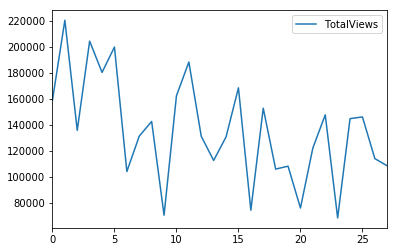

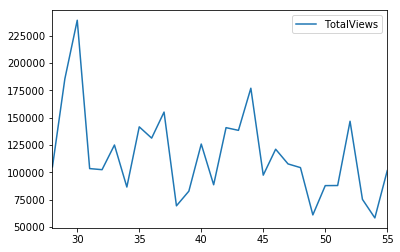

In [116]:
date_df.iloc[0:28].plot()
date_df.iloc[28:56].plot()

In [74]:
# Distinct Game IDs (2000 in total)
pd.read_sql_query("SELECT DISTINCT(Game_ID) FROM train_data ORDER BY 1 asc", connection)

,Game_ID
0,21600001
1,21600002
2,21600003
3,21600004
4,21600005
5,21600006
6,21600007
7,21600008
8,21600009
9,21600011
